In [2]:
import math
import numpy as np

from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras import losses
from tensorflow.keras.optimizers import Adam

import tensorflow as tf

In [3]:

rnn_x = Input(shape=(10,50))
lstm = LSTM(30, return_sequences=True, return_state = True)
lstm_output_model, _ , _ = lstm(rnn_x)
mdn = Dense(20) 

mdn_model = mdn(lstm_output_model)

model = Model(rnn_x, mdn_model)


In [4]:
# インプットデータの成型
data = np.array([0.1, 0.2, 0.3]).reshape((1,3,1))

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 50)]          0         
_________________________________________________________________
lstm (LSTM)                  [(None, 10, 30), (None, 3 9720      
_________________________________________________________________
dense (Dense)                (None, 10, 20)            620       
Total params: 10,340
Trainable params: 10,340
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.layers[1].output_shape 
#隠れ層の最後の出力系列、隠れ層の最後の出力、隠れ層の最後の状態

[(None, 10, 30), (None, 30), (None, 30)]

In [54]:
model.layers[1].weights

[<tf.Variable 'lstm_12/lstm_cell_12/kernel:0' shape=(36, 1024) dtype=float32, numpy=
 array([[-0.0164, -0.0505,  0.0573, ...,  0.0186, -0.0052, -0.0554],
        [ 0.0311, -0.0185,  0.0666, ..., -0.0582, -0.0505,  0.0508],
        [-0.0748, -0.0539, -0.0044, ..., -0.0355,  0.0534, -0.0547],
        ...,
        [ 0.0486, -0.0558, -0.0576, ..., -0.0029, -0.0097,  0.0039],
        [-0.0666,  0.0005, -0.0416, ..., -0.0632,  0.0525, -0.0135],
        [ 0.0152,  0.0014, -0.055 , ...,  0.037 ,  0.0539,  0.0411]],
       dtype=float32)>,
 <tf.Variable 'lstm_12/lstm_cell_12/recurrent_kernel:0' shape=(256, 1024) dtype=float32, numpy=
 array([[-0.0455,  0.0127, -0.0026, ...,  0.0213, -0.0237,  0.0144],
        [ 0.0168, -0.0078,  0.0015, ...,  0.0161,  0.0182, -0.0177],
        [ 0.0049, -0.0125,  0.0164, ..., -0.0485, -0.0105, -0.0047],
        ...,
        [ 0.0552,  0.0214, -0.0315, ..., -0.0137, -0.0075,  0.035 ],
        [-0.024 , -0.0548,  0.0233, ..., -0.0492, -0.0599,  0.0243],
        [

In [8]:
# 予測
print(model.predict(data))

ValueError: in user code:

    /home/shun/miniconda3/envs/env_GDL2/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1147 predict_function  *
        outputs = self.distribute_strategy.run(
    /home/shun/miniconda3/envs/env_GDL2/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/shun/miniconda3/envs/env_GDL2/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/shun/miniconda3/envs/env_GDL2/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/shun/miniconda3/envs/env_GDL2/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1122 predict_step  **
        return self(x, training=False)
    /home/shun/miniconda3/envs/env_GDL2/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    /home/shun/miniconda3/envs/env_GDL2/lib/python3.6/site-packages/tensorflow/python/keras/engine/network.py:719 call
        convert_kwargs_to_constants=base_layer_utils.call_context().saving)
    /home/shun/miniconda3/envs/env_GDL2/lib/python3.6/site-packages/tensorflow/python/keras/engine/network.py:888 _run_internal_graph
        output_tensors = layer(computed_tensors, **kwargs)
    /home/shun/miniconda3/envs/env_GDL2/lib/python3.6/site-packages/tensorflow/python/keras/layers/recurrent.py:654 __call__
        return super(RNN, self).__call__(inputs, **kwargs)
    /home/shun/miniconda3/envs/env_GDL2/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:886 __call__
        self.name)
    /home/shun/miniconda3/envs/env_GDL2/lib/python3.6/site-packages/tensorflow/python/keras/engine/input_spec.py:227 assert_input_compatibility
        ', found shape=' + str(shape))

    ValueError: Input 0 is incompatible with layer lstm: expected shape=(None, None, 50), found shape=[None, 3, 1]


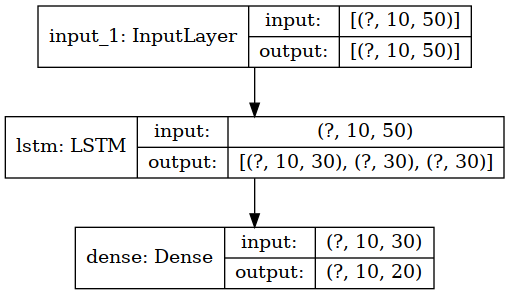

In [9]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='./rnn/model1.png', show_shapes=True)

In [10]:
rnn_x = Input(shape=(50,50))
lstm = LSTM(30, return_sequences=True, return_state = True)
lstm_output_model, _ , _ = lstm(rnn_x)
mdn = Dense(20) 

mdn_model = mdn(lstm_output_model)

model = Model(rnn_x, mdn_model)

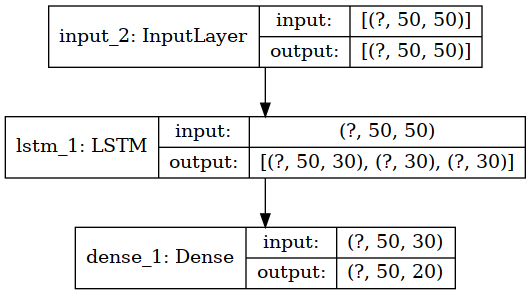

In [11]:
plot_model(model, to_file='./rnn/model2.png', show_shapes=True)

In [12]:
from tensorflow.keras.layers import Dense, LSTM, Input, Embedding, Dropout
n_units = 256
embedding_size = 50
total_words=100

text_in = Input(shape = (40,))
#total_words=100, embedding_size = 50
embedding = Embedding(total_words, embedding_size)
x = embedding(text_in)
x = LSTM(n_units)(x)
# x = Dropout(0.2)(x)
text_out = Dense(total_words, activation = 'softmax')(x)

model = Model(text_in, text_out)

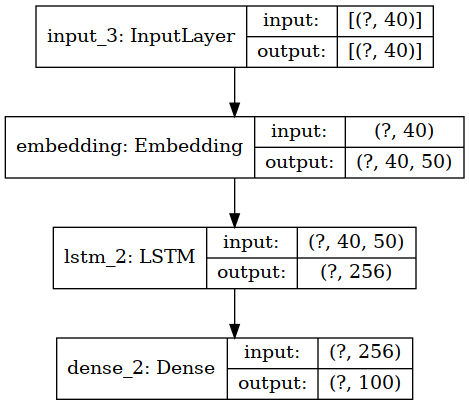

In [13]:
plot_model(model, to_file='./rnn/model3.png', show_shapes=True)

In [14]:

from numpy import array
# モデルの定義
inputs1 = Input(shape=(3, 1))
lstm = LSTM(2, return_sequences=True)(inputs1)
model = Model(inputs=inputs1, outputs=lstm)
# インプットデータの成型
data = array([0.1, 0.2, 0.3]).reshape((1,3,1))


In [15]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 3, 1)]            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 3, 2)              32        
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


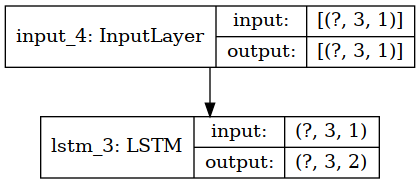

In [16]:
plot_model(model, to_file='./rnn/lstmmodel1.png', show_shapes=True)

In [17]:
# 予測
print(model.predict(data))

[[[-0.00744043  0.00428138]
  [-0.01941692  0.01112919]
  [-0.03406028  0.01951777]]]


In [18]:
# モデルの定義
inputs1 = Input(shape=(3, 1))
lstm1, state_h, state_c = LSTM(1, return_state=True)(inputs1)
model = Model(inputs=inputs1, outputs=[lstm1, state_h, state_c])
# インプットデータの成型
data = array([0.1, 0.2, 0.3]).reshape((1,3,1))

In [19]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 3, 1)]            0         
_________________________________________________________________
lstm_4 (LSTM)                [(None, 1), (None, 1), (N 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


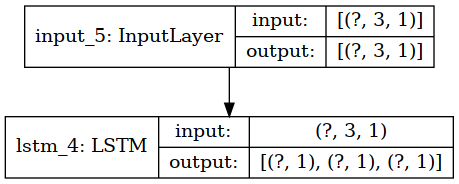

In [20]:
plot_model(model, to_file='./rnn/lstmmodel2.png', show_shapes=True)

In [21]:
# 予測
print(model.predict(data))

[array([[-0.08672053]], dtype=float32), array([[-0.08672053]], dtype=float32), array([[-0.18907428]], dtype=float32)]


In [22]:
import tensorflow as tf 
import numpy as np 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.optimizers import SGD

# tf.random.set_seed(111)
# np.random.seed(111)

modelsim = Sequential([
    SimpleRNN(3, activation=None, input_shape=(10, 1), return_sequences=True)
])

In [23]:
modelsim.layers[0].weights

[<tf.Variable 'simple_rnn/simple_rnn_cell/kernel:0' shape=(1, 3) dtype=float32, numpy=array([[-0.80047715,  1.1670924 ,  0.8468641 ]], dtype=float32)>,
 <tf.Variable 'simple_rnn/simple_rnn_cell/recurrent_kernel:0' shape=(3, 3) dtype=float32, numpy=
 array([[ 0.01744354,  0.36222982,  0.9319256 ],
        [-0.9172685 , -0.36511654,  0.15908623],
        [-0.3978872 ,  0.85760105, -0.32589316]], dtype=float32)>,
 <tf.Variable 'simple_rnn/simple_rnn_cell/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

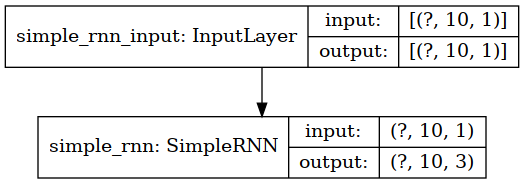

In [24]:
plot_model(modelsim, to_file='./rnn/lstmmodesim.png', show_shapes=True)

In [25]:
modellstm1 = Sequential([
    LSTM(2, activation=None, input_shape=(10, 1), return_sequences=True)
])

In [26]:
modellstm1.layers[0].weights

[<tf.Variable 'lstm_5/lstm_cell_5/kernel:0' shape=(1, 8) dtype=float32, numpy=
 array([[ 0.39992726, -0.28571492, -0.50790817,  0.37373424,  0.3246752 ,
         -0.01999724,  0.28098118, -0.6025242 ]], dtype=float32)>,
 <tf.Variable 'lstm_5/lstm_cell_5/recurrent_kernel:0' shape=(2, 8) dtype=float32, numpy=
 array([[ 0.22326982, -0.09383011, -0.58062613,  0.2189944 , -0.1957999 ,
          0.24294747, -0.49085012,  0.46686867],
        [-0.32444653,  0.26500258, -0.15923297,  0.09240316,  0.4233263 ,
          0.483775  , -0.3667848 , -0.492788  ]], dtype=float32)>,
 <tf.Variable 'lstm_5/lstm_cell_5/bias:0' shape=(8,) dtype=float32, numpy=array([0., 0., 1., 1., 0., 0., 0., 0.], dtype=float32)>]

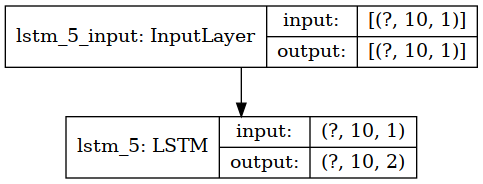

In [27]:
plot_model(modellstm1, to_file='./rnn/modellstm1.png', show_shapes=True)

In [51]:
# モデルの定義
inputs5 = Input(shape=(None, 36))
lstml=LSTM(256, return_sequences=True,return_state=True)

lstma, _, _ = lstml(inputs5)

mdn = Dense(480 + 1) 
mdn_model = mdn(lstma)
model5 = Model(inputs5, mdn_model)
# インプットデータの成型


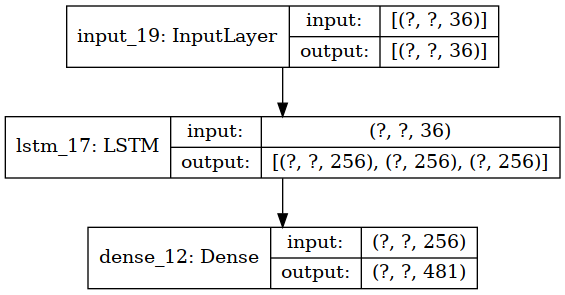

In [52]:
plot_model(model5, to_file='./rnn/modellstm1.png', show_shapes=True)

In [37]:
%matplotlib inline
import numpy as np
from rnn.arch import RNN
from vae.arch import VAE
import matplotlib.pyplot as plt
from gym.utils import seeding
from IPython import display
import time
from tensorflow.keras.utils import plot_model

np.set_printoptions(precision=4, suppress = True)

In [38]:
rnn = RNN()
rnn.set_weights('./rnn/weights2000str.100.h5')

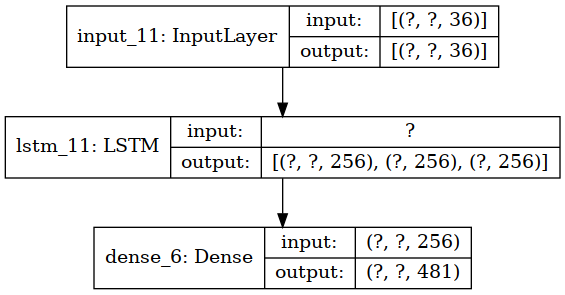

In [39]:
plot_model(rnn.model, to_file='./rnn/model.png', show_shapes=True)

In [41]:
rnn_x = Input(shape=(None, 36))
lstm = LSTM(256, return_sequences=True, return_state = True)

lstm_output_model, _ , _ = lstm(rnn_x)

mdn = Dense(481) 
mdn_model = mdn(lstm_output_model)#(None,系列長,256)を(None,系列長,481)へ
model = Model(rnn_x, mdn_model)

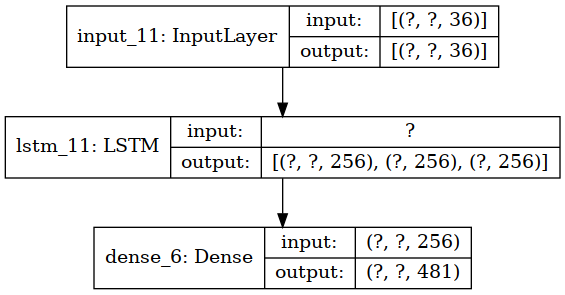

In [42]:
plot_model(rnn.model, to_file='./rnn/model.png', show_shapes=True)